In [19]:
import pandas as pd
import string

In [20]:
df = pd.read_csv('hotel_reviews.csv')
df.head(5)

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...


In [21]:
len(df.index)

7001

In [22]:
df = df.drop(['Index','Area', 'Review_Date',
              'Rating_attribute'], axis=1)

df.rename(columns={'Rating(Out of 10)': 'Rating'}, inplace=True)
df.to_csv('hotel_reviews_label.csv', index=False)

df.head(5)

,Name,Rating,Review_Text
0,Hotel The Pearl,9.0,Hotel the pearl is perfect place to stay in De...
1,Hotel The Pearl,9.0,Location of the hotel is perfect. The hotel is...
2,Hotel The Pearl,9.0,"Location, Indian food."
3,Hotel The Pearl,9.0,The location and the hotel itself is great. Ne...
4,Hotel The Pearl,9.0,Friendly and smiling staffs.. The reception st...


**LABELLING DATA**

In [23]:
from textblob import TextBlob
import numpy as np

df = pd.read_csv('hotel_reviews_label.csv')

sentiments = []

for text in df['Review_Text']:
  if isinstance(text, str):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    sentiments.append(polarity)
  else:
    sentiments.append(np.nan)

df['sentiment_polarity'] = sentiments

df['sentiment'] = df['sentiment_polarity'].apply(lambda x: 'positif' if x > 0 else ('negatif' if x < 0 else 'netral'))

df = df[['Name', 'Rating', 'Review_Text', 'sentiment_polarity', 'sentiment']]

df = df.drop('sentiment_polarity', axis=1)
df.to_csv('hotel_reviews_label.csv', index=False)

df.head(5)

,Name,Rating,Review_Text,sentiment
0,Hotel The Pearl,9.0,Hotel the pearl is perfect place to stay in De...,positif
1,Hotel The Pearl,9.0,Location of the hotel is perfect. The hotel is...,positif
2,Hotel The Pearl,9.0,"Location, Indian food.",netral
3,Hotel The Pearl,9.0,The location and the hotel itself is great. Ne...,positif
4,Hotel The Pearl,9.0,Friendly and smiling staffs.. The reception st...,positif


**CEK MISSING VALUE**

In [24]:
df.isnull().sum()

,0
Name,0
Rating,0
Review_Text,7
sentiment,0


In [25]:
df.dropna(subset=['Review_Text'],inplace=True)
df.to_csv('hotel_reviews_label.csv', index=False)
df.isnull().sum()

,0
Name,0
Rating,0
Review_Text,0
sentiment,0


In [26]:
len(df.index)

6994

**PRE-PROCESSING**

In [27]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('stopwords')
df = pd.read_csv('hotel_reviews_label.csv', encoding='utf-8')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

# Huruf besar menjadi huruf kecil
df['Text Preprocessing'] = df['Review_Text'].astype(str).str.lower()

# Punctuation
def hapus_tanda(text):
    return re.sub(r'[^\w\s]', '', text)

df['Text Preprocessing'] = df['Text Preprocessing'].apply(hapus_tanda)

# Stopwords
STOPWORDS = set(stopwords.words('english'))

def hapus_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in STOPWORDS])

df['Text Preprocessing'] = df['Text Preprocessing'].apply(hapus_stopwords)

# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word, pos='v') for word in text.split()])

df['Text Preprocessing'] = df['Text Preprocessing'].apply(lemmatize_text)

# Melakukan Tokenisasi
def tokenize(text):
    return word_tokenize(text)

df['Text Preprocessing'] = df['Text Preprocessing'].apply(tokenize)

df.to_csv('hotel_reviews_label.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


**VISUALISASI DATA**

<ipython-input-47-5767d3bf3168>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


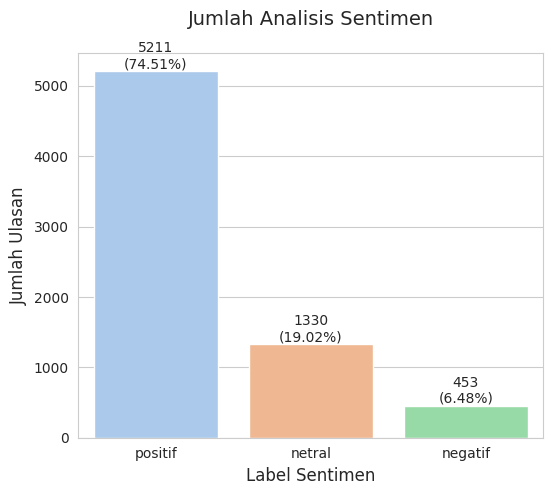

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv('hotel_reviews_label.csv', encoding='utf-8')

sentiment_count = df['sentiment'].value_counts()
sentiment_order = ['positif', 'netral', 'negatif']
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.barplot(
    x=sentiment_count.index,
    y=sentiment_count.values,
    palette='pastel',
    order=sentiment_order
)

plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)

total = len(df['sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

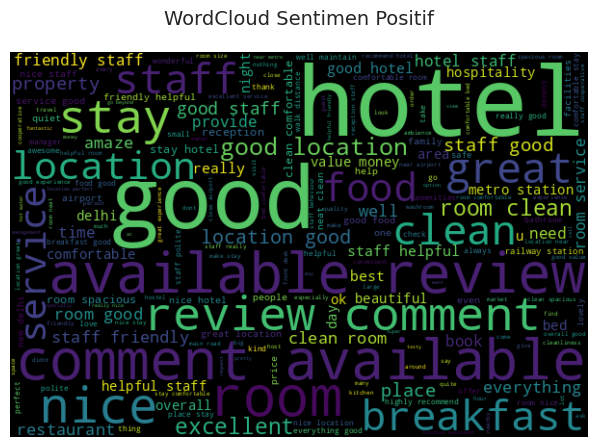

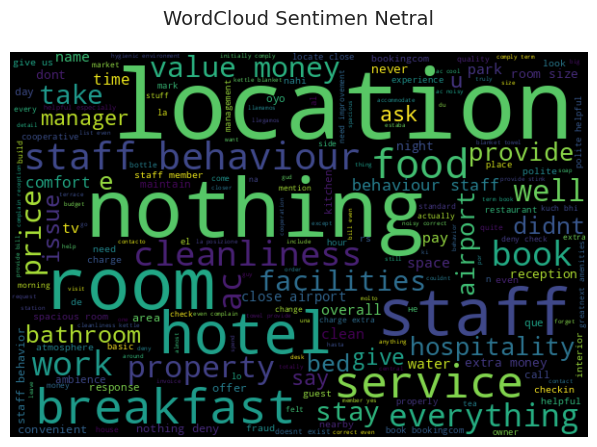

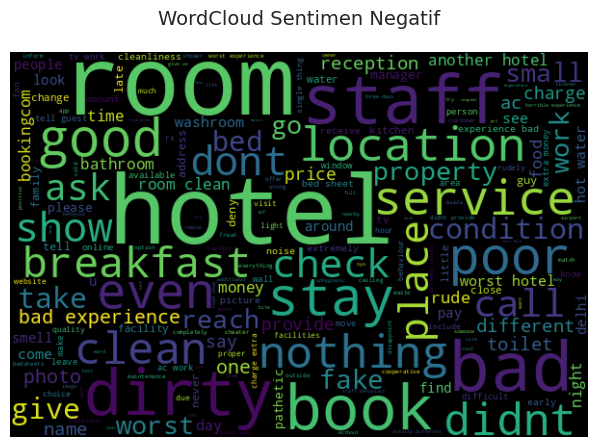

In [48]:
sentimen_positif = df[df['sentiment'] == 'positif']['Text Preprocessing'].apply(lambda x: ' '.join(eval(x))).str.cat(sep=' ')
sentimen_netral = df[df['sentiment'] == 'netral']['Text Preprocessing'].apply(lambda x: ' '.join(eval(x))).str.cat(sep=' ')
sentimen_negatif = df[df['sentiment'] == 'negatif']['Text Preprocessing'].apply(lambda x: ' '.join(eval(x))).str.cat(sep=' ')

def create_wordcloud(text, title):
    wordcloud = WordCloud(
        width=600,
        height=400,
        random_state=42,
        max_font_size=100,
        background_color='black'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14, pad=20)
    plt.show()

create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')
create_wordcloud(sentimen_netral, 'WordCloud Sentimen Netral')
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

**SPLITTING DATA**

In [30]:
x = df['Text Preprocessing']
y = df['sentiment']

train_ratio = 0.8
np.random.seed(42)
indices = np.random.permutation(len(df))
train_size = int(len(df) * train_ratio)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

x_train = x.iloc[train_indices]
x_test = x.iloc[test_indices]
y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]

print(f"Jumlah data pelatihan: {len(x_train)}")
print(f"Jumlah data pengujian: {len(x_test)}")

Jumlah data pelatihan: 5595
Jumlah data pengujian: 1399


In [31]:
# Menghitung probabilitas prior
total_samples = len(x_train)
prior_probabilities = y_train.value_counts() / total_samples

positive_data = x_train[y_train == 'positif']
neutral_data = x_train[y_train == 'netral']
negative_data = x_train[y_train == 'negatif']

In [32]:
# FEATURE ENGINEERING COUNT VECTORIZER
def count_words(tokens):
    return Counter(tokens)

positive_freq = Counter()
neutral_freq = Counter()
negative_freq = Counter()

for tokens in positive_data:
    positive_freq.update(count_words(tokens))

for tokens in neutral_data:
    neutral_freq.update(count_words(tokens))

for tokens in negative_data:
    negative_freq.update(count_words(tokens))

In [33]:
total_positive_words = sum(positive_freq.values())
total_neutral_words = sum(neutral_freq.values())
total_negative_words = sum(negative_freq.values())

all_words = list(set(positive_freq.keys()) | set(neutral_freq.keys()) | set(negative_freq.keys()))
feature_count = len(all_words)

# Probabilitas kondisional dengan Laplace smoothing
prob_cond_positive = {word: (positive_freq.get(word, 0) + 1) / (total_positive_words + feature_count) for word in all_words}
prob_cond_neutral = {word: (neutral_freq.get(word, 0) + 1) / (total_neutral_words + feature_count) for word in all_words}
prob_cond_negative = {word: (negative_freq.get(word, 0) + 1) / (total_negative_words + feature_count) for word in all_words}

In [34]:
import joblib

naive_bayes_model = {
    'prior_probabilities': prior_probabilities,
    'prob_cond_positive': prob_cond_positive,
    'prob_cond_neutral': prob_cond_neutral,
    'prob_cond_negative': prob_cond_negative,
    'total_positive_words': total_positive_words,
    'total_neutral_words': total_neutral_words,
    'total_negative_words': total_negative_words,
    'feature_count': feature_count
}

joblib.dump(naive_bayes_model, 'naive_bayes_model.pkl')

print("Model berhasil disimpan sebagai 'naive_bayes_model.pkl'")

Model berhasil disimpan sebagai 'naive_bayes_model.pkl'


In [35]:
def classify_document(doc, model):
    prior_prob = model['prior_probabilities']
    prob_cond_positive = model['prob_cond_positive']
    prob_cond_neutral = model['prob_cond_neutral']
    prob_cond_negative = model['prob_cond_negative']
    total_positive_words = model['total_positive_words']
    total_neutral_words = model['total_neutral_words']
    total_negative_words = model['total_negative_words']
    feature_count = model['feature_count']

    if isinstance(doc, list):
        words = doc
    else:
        words = doc.split()

    posterior_positive = prior_prob['positif']
    posterior_neutral = prior_prob['netral']
    posterior_negative = prior_prob['negatif']

    for word in words:
        posterior_positive *= prob_cond_positive.get(word, 1 / (total_positive_words + feature_count))
        posterior_neutral *= prob_cond_neutral.get(word, 1 / (total_neutral_words + feature_count))
        posterior_negative *= prob_cond_negative.get(word, 1 / (total_negative_words + feature_count))

    return max(
        {'positif': posterior_positive, 'netral': posterior_neutral, 'negatif': posterior_negative},
        key=lambda x: {'positif': posterior_positive, 'netral': posterior_neutral, 'negatif': posterior_negative}[x]
    )

In [36]:
x_train_predicted = x_train.apply(lambda x: classify_document(x, naive_bayes_model))
x_test_predicted = x_test.apply(lambda x: classify_document(x, naive_bayes_model))

train_accuracy = (y_train == x_train_predicted).mean() * 100
test_accuracy = (y_test == x_test_predicted).mean() * 100

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

train_data_with_predictions = pd.DataFrame({'Review_Text': x_train, 'True Sentiment': y_train, 'Predicted Sentiment': x_train_predicted})
test_data_with_predictions = pd.DataFrame({'Review_Text': x_test, 'True Sentiment': y_test, 'Predicted Sentiment': x_test_predicted})

train_data_with_predictions.to_csv('train_data_with_predictions.csv', index=False)
test_data_with_predictions.to_csv('test_data_with_predictions.csv', index=False)


Train Accuracy: 87.35%
Test Accuracy: 85.06%


In [37]:
def analyze_raw_text(input_text, model):
    predicted_sentiment = classify_document(input_text, model)
    return predicted_sentiment

loaded_model = joblib.load('naive_bayes_model.pkl')

new_text = input("Masukkan teks review untuk analisis sentimen: ")

predicted_sentiment = analyze_raw_text(new_text, loaded_model)
print(f"Sentimen teks: {predicted_sentiment}")

Masukkan teks review untuk analisis sentimen: worst
Sentimen teks: negatif
